In [49]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import preprocessing
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import warnings

In [33]:
warnings.filterwarnings("ignore")
df = pd.read_csv("0JFV001103_UA3_AA1_Anexo.csv", sep=",")

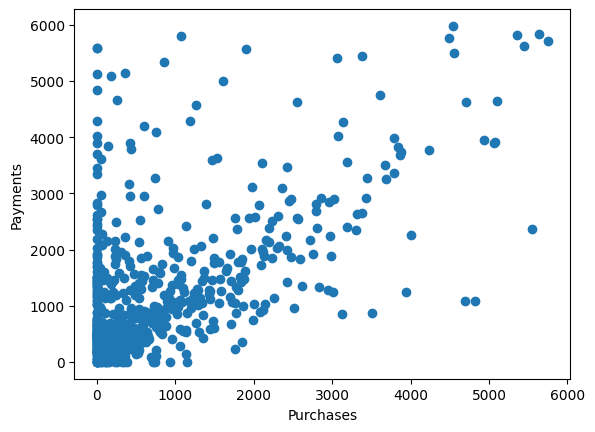

In [34]:
plt.scatter(df["PURCHASES"],df["PAYMENTS"])
plt.xlabel("Purchases")
plt.ylabel("Payments")
plt.show()

# K-Means

In [61]:
km = KMeans(n_clusters=10).fit(df[["PURCHASES","PAYMENTS"]])
centroids = km.cluster_centers_

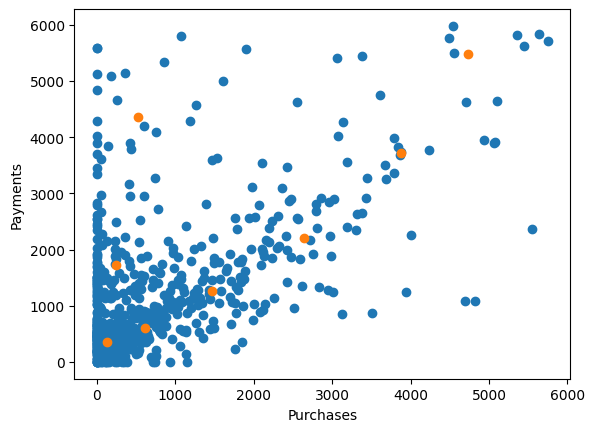

In [62]:
plt.scatter(df["PURCHASES"],df["PAYMENTS"])
plt.xlabel("Purchases")
plt.ylabel("Payments")
plt.scatter(centroids[:,0],centroids[:,1])
plt.show()

In [63]:
clusters = km.predict(df[["PURCHASES","PAYMENTS"]])
df["CLUSTER_ID"] = clusters

In [64]:
inertia = []
for x in range(1,11):
    km = KMeans(n_clusters=x).fit(df[["PURCHASES","PAYMENTS"]])
    inertia.append(km.inertia_)

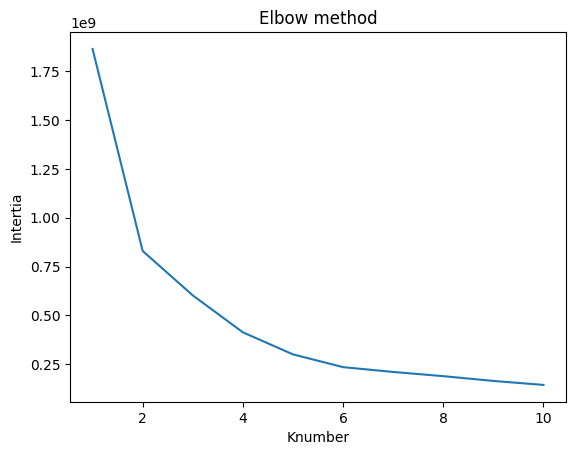

In [65]:
x = [z for z in range(1,11)]
plt.plot(x,inertia)
plt.xlabel("Knumber")
plt.ylabel("Intertia")
plt.title("Elbow method")
plt.show()

# DBSCAN

In [40]:
x_norm = preprocessing.MinMaxScaler().fit_transform(df[["PURCHASES","PAYMENTS"]])

In [41]:
db = DBSCAN(eps=0.08, min_samples=5).fit(x_norm)
labels = db.labels_

# Hierarchical clustering

In [55]:
df2 = df[0:30]
dendogram_labels = df2["CUST_ID"].values
df2.drop(columns=["CUST_ID"], inplace=True)
df2.shape

(30, 17)

In [59]:
linked = linkage(df2,'average')

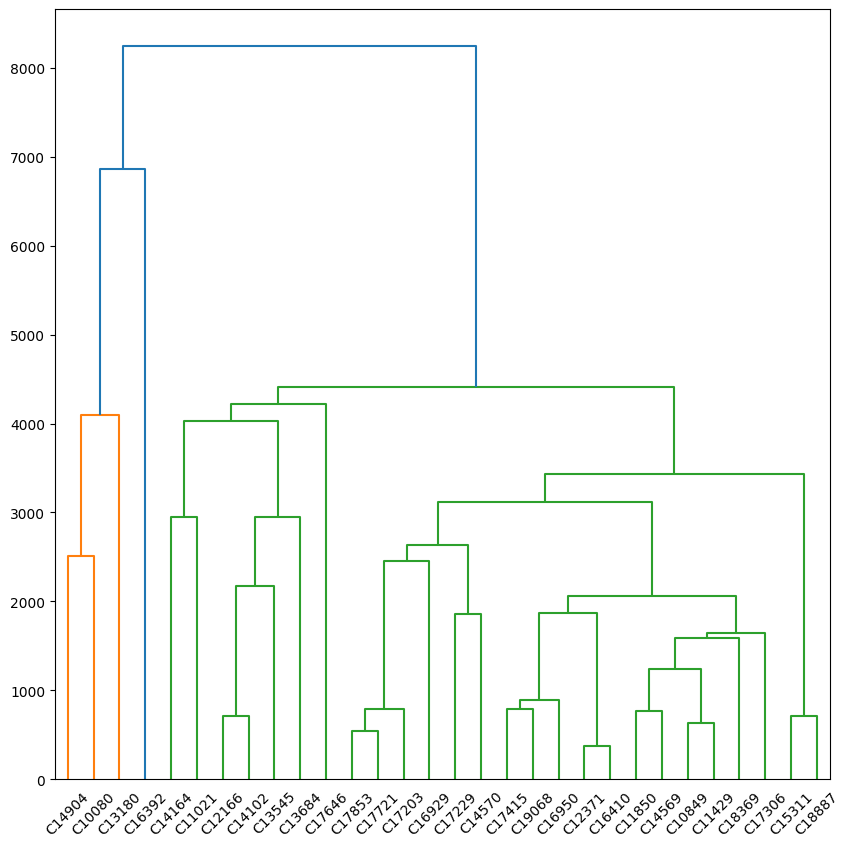

In [67]:
plt.figure(figsize=(10,10))
dendrogram(linked, orientation="top", labels=dendogram_labels, distance_sort="descending", show_leaf_counts=True)
plt.show()